In [ ]:
pip install nbimporter

In [1]:
import numpy as np 
import nbimporter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import matplotlib.pyplot as plt

In [ ]:
X,y = datasets.make_regression(n_samples=100, n_features = 1, noise = 20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1234) 

fig = plt.figure()
plt.scatter(X[:,0],y, color='b',marker='o',s=30)
plt.show()

In [ ]:
from linear_regression import LinearRegression
regressor = LinearRegression(lr=0.01)
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

def mse(y_true, y_predicted):
    return np.mean((y_true-y_predicted)**2)

mse_value = mse(y_test,predicted)
print(mse_value)

In [ ]:
y_pred_line = regressor.predict(X)
cmap = plt.get_cmap('viridis')
m1 = plt.scatter(X_train, y_train, color = cmap(0.9),s=10)
m2 = plt.scatter(X_test, y_test, color = cmap(0.5),s=10)
plt.plot(X, y_pred_line, color = 'black', linewidth = 2, label='prediction' )
plt.show()

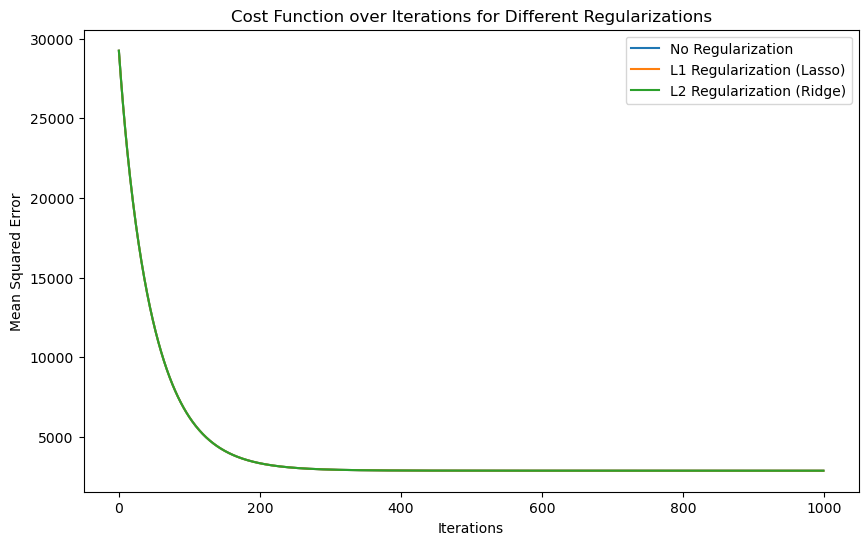

In [ ]:
# With Regularization

from linear_regression import LinearRegression

# Step 1: Load and split the Diabetes dataset
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

# Standardize features for better convergence
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Step 2: Train three models
models = {
    "No Regularization": LinearRegression(lr=0.01, n_iters=1000, regularization="none"),
    "L1 Regularization (Lasso)": LinearRegression(lr=0.01, n_iters=1000, regularization="l1", reg_param=0.2),
    "L2 Regularization (Ridge)": LinearRegression(lr=0.01, n_iters=1000, regularization="l2", reg_param=0.3)
}

# Fit models and collect cost history for plotting
for name, model in models.items():
    model.fit(X_train, y_train)

# Step 3: Plot the cost function for each model
plt.figure(figsize=(10, 6))

for name, model in models.items():
    plt.plot(model.cost_history, label=name)

plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.title("Cost Function over Iterations for Different Regularizations")
plt.legend()
plt.show()